In [164]:
## altering to add eps and time of year
# Importing the libraries

## This is a working systemt that takes in multiple features and displays back a plotted 
# prediction to the user.
## array alteration method implementation

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
#from keras.optimizers import sgd
import math
from sklearn.metrics import mean_squared_error


In [176]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Stock Price')
    plt.title('Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    

def Directional_error(test, predicted):
    correct = 0
    wrong = 0
    for x in range(len(test)):
        if(x==0):
            continue
        elif((test[x]>test[x-1]) and (predicted[x]>predicted[x-1])):
            ##case in which both went up
            correct +=1
        elif((test[x]<test[x-1]) and (predicted[x]<predicted[x-1])):
            ##case in which both went down
            correct +=1
        elif(test[x] == predicted[x]):
            #case in which both are the same
            correct+=1
        else:
            wrong+=1
    accuracy = round((correct/(correct+wrong))*100 , 2)
    print("The directional accuracy is {}.".format(accuracy))

    
    
def GRUModelBuild(arrX, arrY, arrDem):
    # The GRU architecture
    ModelGRU = Sequential()
    # First GRU layer with Dropout regularisation
    ModelGRU.add(GRU(units=70, return_sequences=True, input_shape=(54,arrDem), activation='tanh'))
    ModelGRU.add(Dropout(0.1))
    # Second GRU layer
    ModelGRU.add(GRU(units=150, return_sequences=True, input_shape=(54,arrDem), activation='tanh'))
    ModelGRU.add(Dropout(0.2))
    # Third GRU layer
    ModelGRU.add(GRU(units=150, input_shape=(54, arrDem), activation='tanh'))
    #ModelGRU.add(Dropout(0.2))

    # The output layer
    ModelGRU.add(Dense(units=1, activation='relu' ))
    # Compiling the RNN GRU

    ModelGRU.compile(optimizer='adam' , loss='mean_squared_error')
    # Fitting to the training set
    return ModelGRU


    


In [166]:
dataset = pd.read_csv('C:/Users/hsipp/Downloads/MCD_stock_data.csv', index_col='Date', parse_dates=['Date'])
dataset.index = pd.to_datetime(dataset.index)
dataset['Day'] = dataset.index.dayofyear  # list days as their day of year
dataset = dataset.dropna() # remove all NaNs
dataset = dataset.drop(columns = ['Volume', 'Adj Close']) #

print(dataset.keys())
#dataset.head()
print(dataset)
#dataset = web.DataReader('AAPL', data_source='yahoo', start = '2009-01-05', end='2019-12-20')


output_var = pd.DataFrame( dataset['Close'] )
Y_train = output_var[:'2018'].values.round(5)
Y_test = output_var['2019':'2019'].values.round(5)

dataset = dataset.drop(columns = ['Close'])

#print("New implementation:", Y_train)

## Old implementation
#y_training_set = dataset[:'2019'].iloc[:,3:4].values
#print(y_training_set)
#test_set_real = dataset['2020':'2020'].iloc[:,3:4].values


X_train = dataset[:'2018'].iloc[:,0:5].values
X_test = dataset['2019':'2019'].iloc[:,0:5].values  ## grouping day of year in and scaling...

print(X_train)


# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)

#sc.data_max_[2]
#print(Xmax)

y_training_set = sc.fit_transform(Y_train)    #scaling here is still a data concern.
Y_test = sc.fit_transform(Y_test)
#print("y_training set: \n", y_training_set, "\n\n")
#print(training_set_scaled)


Index(['High', 'Low', 'Open', 'Close', 'EPS', 'Day'], dtype='object')
                  High         Low        Open       Close   EPS  Day
Date                                                                 
2008-12-31   62.389999   61.320000   61.639999   62.189999  0.87  366
2009-01-02   64.129997   62.200001   62.380001   63.750000  0.87    2
2009-01-05   63.840000   62.889999   63.259998   63.560001  0.87    5
2009-01-06   64.459999   61.830002   63.990002   62.139999  0.87    6
2009-01-07   62.570000   60.840000   61.930000   61.240002  0.87    7
...                ...         ...         ...         ...   ...  ...
2021-12-23  267.369995  265.450012  265.920013  265.950012  2.18  357
2021-12-27  268.260010  266.000000  266.470001  268.239990  2.18  361
2021-12-28  269.220001  267.250000  267.579987  267.880005  2.18  362
2021-12-29  269.720001  267.950012  268.450012  268.489990  2.18  363
2021-12-30  269.260010  266.700012  269.000000  267.209991  2.18  364

[3273 rows x 6 colu

In [167]:
#dataset_total = pd.concat((dataset["High"][:'2018'],dataset["High"]['2019':]),axis=0)
#test_set = dataset['2017':].iloc[:,0:4].values


inputs = sc.transform(X_test)

X_test_lookback = []

for i in range(54,len(inputs)):  ## *************double check this len statement
    X_test_lookback.append(inputs[i-54:i])


X_test_lookback = np.array(X_test_lookback)
#print(X_test_lookback)
X_test_lookback = np.reshape(X_test_lookback, (X_test_lookback.shape[0],X_test_lookback.shape[1],5))

print(X_test_lookback.shape[0])
print(X_test_lookback.shape[1])
print(X_test_lookback.shape[2])
print(X_test_lookback)

198
54
5
[[[ 0.04938541  0.00423905  0.03052149 -3.65091218 -3.64497746]
  [ 0.05256459  0.00932607  0.03136917 -3.65091218 -3.62378203]
  [ 0.11085201  0.03645618  0.04366255 -3.65091218 -3.60258661]
  ...
  [ 0.26049167  0.2000849   0.25455698 -3.65091218 -2.05532049]
  [ 0.22043233  0.18143282  0.2138618  -3.65091218 -2.03412506]
  [ 0.24141592  0.17698196  0.19944906 -3.65091218 -2.01292963]]

 [[ 0.05256459  0.00932607  0.03136917 -3.65091218 -3.62378203]
  [ 0.11085201  0.03645618  0.04366255 -3.65091218 -3.60258661]
  [ 0.16765593  0.08838491  0.08838491 -3.65091218 -3.53900033]
  ...
  [ 0.22043233  0.18143282  0.2138618  -3.65091218 -2.03412506]
  [ 0.24141592  0.17698196  0.19944906 -3.65091218 -2.01292963]
  [ 0.2683342   0.221704    0.22191616 -3.65091218 -1.99173421]]

 [[ 0.11085201  0.03645618  0.04366255 -3.65091218 -3.60258661]
  [ 0.16765593  0.08838491  0.08838491 -3.65091218 -3.53900033]
  [ 0.1763458   0.12590091  0.1693516  -3.65091218 -3.5178049 ]
  ...
  [ 0.241

In [169]:

X_train_lookback = []
y_train = []


#print(training_set_scaled[54-54:54, 1])

for i in range(54,len(training_set_scaled)): ## *************double check this len statement
    X_train_lookback.append(training_set_scaled[i-54:i])
    y_train.append(y_training_set[i,0])
    
X_train_lookback, y_train = np.array(X_train_lookback), np.array(y_train)

# Reshaping X_train for efficient modeling
X_train_lookback = np.reshape(X_train_lookback, (X_train_lookback.shape[0],X_train_lookback.shape[1],5))

#print(len(training_set))
#print(len(X_train_lookback))
print(X_train_lookback.shape[0])
print(X_train_lookback.shape[1])
print(X_train_lookback.shape[2])
print(X_train_lookback)


2463
54
5
[[[0.07354532 0.07874358 0.07456265 0.02027027 1.        ]
  [0.08609127 0.08511256 0.07986808 0.02027027 0.        ]
  [0.0840003  0.09010639 0.08617721 0.02027027 0.00824176]
  ...
  [0.01088761 0.00665848 0.00329796 0.02027027 0.2032967 ]
  [0.0242267  0.02156763 0.01577285 0.02027027 0.20604396]
  [0.0263177  0.0279366  0.03111557 0.02027027 0.20879121]]

 [[0.08609127 0.08511256 0.07986808 0.02027027 0.        ]
  [0.0840003  0.09010639 0.08617721 0.02027027 0.00824176]
  [0.08847069 0.0824347  0.09141096 0.02027027 0.01098901]
  ...
  [0.0242267  0.02156763 0.01577285 0.02027027 0.20604396]
  [0.0263177  0.0279366  0.03111557 0.02027027 0.20879121]
  [0.02191939 0.01809365 0.02322912 0.02027027 0.21153846]]

 [[0.0840003  0.09010639 0.08617721 0.02027027 0.00824176]
  [0.08847069 0.0824347  0.09141096 0.02027027 0.01098901]
  [0.07484318 0.07526961 0.0766418  0.02027027 0.01373626]
  ...
  [0.0263177  0.0279366  0.03111557 0.02027027 0.20879121]
  [0.02191939 0.01809365

In [170]:


## Call GRU build here.

GRU = GRUModelBuild(X_train_lookback, y_train, 5)


GRU.fit(X_train_lookback, y_train, epochs = 10) #,batch_size=150)






Epoch 1/10
77/77 [==============================] - 12s 93ms/step - loss: 0.0080
Epoch 2/10
77/77 [==============================] - 8s 103ms/step - loss: 6.4822e-04
Epoch 3/10
77/77 [==============================] - 8s 109ms/step - loss: 6.7843e-04
Epoch 4/10
77/77 [==============================] - 9s 122ms/step - loss: 5.3428e-04
Epoch 5/10
77/77 [==============================] - 9s 120ms/step - loss: 5.3716e-04
Epoch 6/10
77/77 [==============================] - 8s 105ms/step - loss: 5.7068e-04
Epoch 7/10
77/77 [==============================] - 8s 106ms/step - loss: 5.2159e-04
Epoch 8/10
77/77 [==============================] - 7s 97ms/step - loss: 4.2617e-04
Epoch 9/10
77/77 [==============================] - 10s 129ms/step - loss: 4.2045e-04
Epoch 10/10
77/77 [==============================] - 9s 119ms/step - loss: 6.0464e-04


In [178]:
#X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4))

#print(X_test_lookback.shape[1])
print(X_test_lookback.shape)
print(X_test_lookback[0].shape)


GRU_predicted_stock_price = GRU.predict(np.array([X_test_lookback[0]]))
print(GRU_predicted_stock_price[0][0])

results = []
for x in range(X_test_lookback.shape[0]):
    GRU_predicted_stock_price = GRU.predict(np.array([X_test_lookback[x]]))
    
    results.append(GRU_predicted_stock_price[0][0])
    

#print(results)

#val_loss, val_accuracy = ModelGRU.evaluate(X_test, test_set[54: , 0])
#print(val_loss, val_accuracy)


#print(GRU_predicted_stock_price)




#GRU_predicted_stock_price1 = sc.inverse_transform(results[0])

#print(GRU_predicted_stock_price1)


(198, 54, 5)
(54, 5)
0.21008803


ValueError: Expected 2D array, got scalar array instead:
array=0.21008802950382233.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

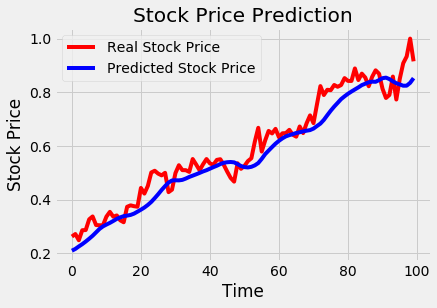

The root mean squared error is 0.05476730887606256.
The directional accuracy is 48.48.


In [177]:
# Visualizing the results for GRU
plot_predictions(Y_test[54:154], results[:100])

# Evaluating GRU
return_rmse(Y_test[54:154], results[:100])

Directional_error(Y_test[54:154], results[:100])
